# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## Contents <a id ="Content" > </a>

## Introduction <a id = 'Introduction'></a>

## Imports <a id="Imports"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from imblearn.over_sampling import SMOTE

In [2]:
ccattr_data = pd.read_csv("../data/3.ccattr_data_EDA_final.csv")

In [3]:
ccattr_data.dtypes

CLIENTNUM                          int64
Attrition_Numeric                  int64
Customer_Age_zScore              float64
Credit_Limit_log                 float64
Total_Revolving_Bal_divMedian    float64
Total_Trans_Amt_log              float64
Avg_Utilization_Ratio            float64
Gender                            object
Dependent_count                    int64
Education_Level_sorted            object
Marital_Status_sorted             object
Income_Category_sorted            object
Card_Category_sorted              object
Months_on_book_zScore            float64
Total_Relationship_Count           int64
Months_Inactive_12_mon             int64
Contacts_Count_12_mon              int64
naive_cls1                       float64
naive_cls2                       float64
dtype: object

In [4]:
ccattr_data.shape

(10127, 19)

In [5]:
ccattr_data.head().T

,0,1,2,3,4
CLIENTNUM,714648933,717628608,711777633,716645883,708217758
Attrition_Numeric,0,0,0,0,0
Customer_Age_zScore,1.082034,-1.163358,-0.664382,0.084082,2.079986
Credit_Limit_log,8.488999,7.853993,8.662851,9.537267,9.549309
Total_Revolving_Bal_divMedian,0.880094,1.285266,0.0,0.0,1.615204
Total_Trans_Amt_log,7.349874,7.850883,8.33639,8.365672,7.381502
Avg_Utilization_Ratio,0.231,0.637,0.0,0.0,0.147
Gender,F,M,M,M,M
Dependent_count,3,3,3,2,2
Education_Level_sorted,Graduate,Graduate,Graduate,Graduate,Graduate


In [6]:
ccattr_data.dtypes

CLIENTNUM                          int64
Attrition_Numeric                  int64
Customer_Age_zScore              float64
Credit_Limit_log                 float64
Total_Revolving_Bal_divMedian    float64
Total_Trans_Amt_log              float64
Avg_Utilization_Ratio            float64
Gender                            object
Dependent_count                    int64
Education_Level_sorted            object
Marital_Status_sorted             object
Income_Category_sorted            object
Card_Category_sorted              object
Months_on_book_zScore            float64
Total_Relationship_Count           int64
Months_Inactive_12_mon             int64
Contacts_Count_12_mon              int64
naive_cls1                       float64
naive_cls2                       float64
dtype: object

In [7]:
# Label Encode categorical variables 

marital_status = {'Married':1,'Single':2, 'Divorced':3}
ccattr_data['Marital_Status_sorted']=ccattr_data['Marital_Status_sorted'].map(marital_status)


education = {'Uneducated':1,'High School':2, 'Graduate':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
ccattr_data['Education_Level_sorted']=ccattr_data['Education_Level_sorted'].map(education)

income = {'0K - 40K':1,'40k − 60K':2, '80K - 120K':3, '60K - 80K':4, '120K +':5}
ccattr_data['Income_Category_sorted']=ccattr_data['Income_Category_sorted'].map(income)

In [8]:
#Checking that no column has missing values 
ccattr_data.isnull().sum()

CLIENTNUM                        0
Attrition_Numeric                0
Customer_Age_zScore              0
Credit_Limit_log                 0
Total_Revolving_Bal_divMedian    0
Total_Trans_Amt_log              0
Avg_Utilization_Ratio            0
Gender                           0
Dependent_count                  0
Education_Level_sorted           0
Marital_Status_sorted            0
Income_Category_sorted           0
Card_Category_sorted             0
Months_on_book_zScore            0
Total_Relationship_Count         0
Months_Inactive_12_mon           0
Contacts_Count_12_mon            0
naive_cls1                       0
naive_cls2                       0
dtype: int64

In [9]:
## Converting the data type of categorical features to 'category'

cat_cols = ['Attrition_Numeric','Gender', 'Education_Level_sorted', 'Marital_Status_sorted', 'Income_Category_sorted', 'Card_Category_sorted','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

ccattr_data[cat_cols] = ccattr_data[cat_cols].astype('category')
ccattr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   CLIENTNUM                      10127 non-null  int64   
 1   Attrition_Numeric              10127 non-null  category
 2   Customer_Age_zScore            10127 non-null  float64 
 3   Credit_Limit_log               10127 non-null  float64 
 4   Total_Revolving_Bal_divMedian  10127 non-null  float64 
 5   Total_Trans_Amt_log            10127 non-null  float64 
 6   Avg_Utilization_Ratio          10127 non-null  float64 
 7   Gender                         10127 non-null  category
 8   Dependent_count                10127 non-null  category
 9   Education_Level_sorted         10127 non-null  category
 10  Marital_Status_sorted          10127 non-null  category
 11  Income_Category_sorted         10127 non-null  category
 12  Card_Category_sorted           1

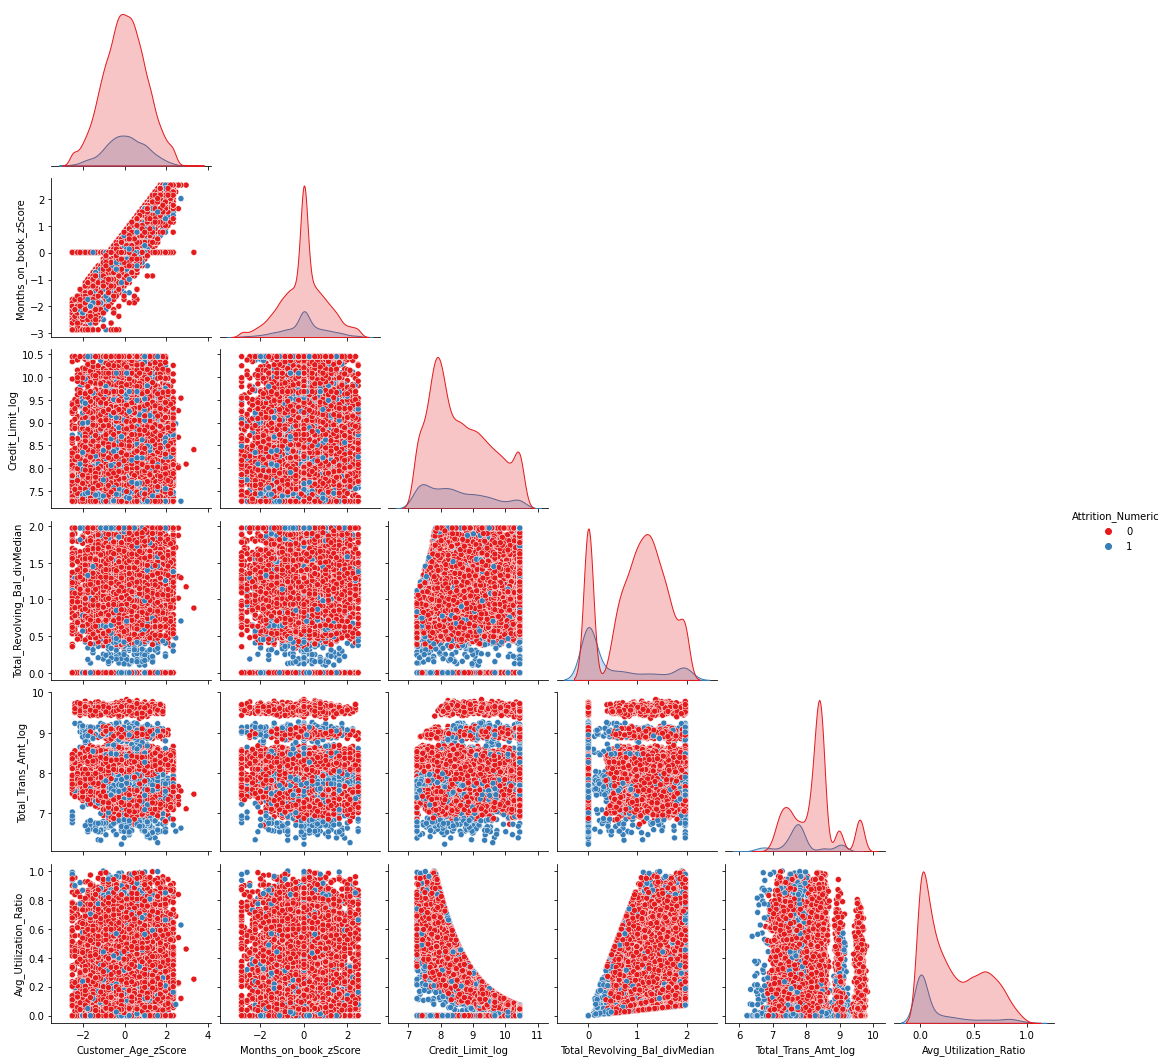

In [10]:
#Corralation

list_cols = ['Attrition_Numeric','Customer_Age_zScore','Dependent_count', 'Months_on_book_zScore',
             'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit_log', 'Total_Revolving_Bal_divMedian',
              'Total_Trans_Amt_log','Avg_Utilization_Ratio']
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(ccattr_data[list_cols], hue="Attrition_Numeric",corner=True)
plt.show()

Looking at the plot it is evident that classifiers are the best models than the linear regressor.

## Train Test Split <a id=Train_Test_Split></a>

In [11]:
# Creating X and y
X = ccattr_data.drop(['Attrition_Numeric','CLIENTNUM','naive_cls1','naive_cls2'],axis=1)
y = ccattr_data['Attrition_Numeric']

In [12]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((7088, 15), (3039, 15))

In [13]:
y_train.shape, y_test.shape

((7088,), (3039,))

In [14]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 43) (3039, 43)


In [15]:
X_train.T

,4410,4930,1335,6267,2413,3267,6000,9667,5729,1705,...,6132,261,670,9797,9616,3176,9425,9816,1890,4995
Customer_Age_zScore,-0.539638,-0.539638,-0.040662,-1.288101,1.581010,0.832546,0.208826,0.707802,-0.165406,-0.165406,...,-0.414894,-1.288101,0.208826,-1.787077,-0.664382,-1.038614,-1.911821,-0.913870,0.084082,0.458314
Credit_Limit_log,10.312845,8.285009,7.555905,9.568294,8.352554,9.941891,8.380457,10.449178,7.271217,8.791182,...,7.574045,7.839919,7.776535,10.425579,9.866875,8.304742,8.457868,10.449178,9.563880,8.006034
Total_Revolving_Bal_divMedian,1.668495,0.954545,0.918495,0.547806,0.000000,0.985110,0.631661,1.268025,0.846395,0.000000,...,0.000000,1.098746,1.250784,1.126176,1.414577,1.972571,0.748433,0.623824,1.630878,1.423981
Total_Trans_Amt_log,8.978408,8.429454,8.484877,8.465057,7.494430,8.247744,8.415825,9.359019,8.395026,7.289611,...,7.658700,7.776535,8.054840,9.607773,9.643615,7.863267,7.850883,8.951699,7.365813,8.540714
Avg_Utilization_Ratio,0.071000,0.307000,0.613000,0.049000,0.000000,0.060000,0.185000,0.047000,0.751000,0.000000,...,0.000000,0.552000,0.669000,0.043000,0.094000,0.623000,0.203000,0.023000,0.146000,0.606000
Months_on_book_zScore,0.008965,-0.617129,0.134183,0.008965,2.137684,1.386371,0.134183,1.010715,-0.116254,0.008965,...,0.259402,-0.992786,0.760277,0.008965,0.008965,-0.742348,-1.994536,-2.119755,0.008965,0.008965
Gender_M,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
Dependent_count_1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dependent_count_2,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
Dependent_count_3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [16]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

Customer_Age_zScore              float64
Credit_Limit_log                 float64
Total_Revolving_Bal_divMedian    float64
Total_Trans_Amt_log              float64
Avg_Utilization_Ratio            float64
Months_on_book_zScore            float64
Gender_M                           uint8
Dependent_count_1                  uint8
Dependent_count_2                  uint8
Dependent_count_3                  uint8
Dependent_count_4                  uint8
Dependent_count_5                  uint8
Education_Level_sorted_2           uint8
Education_Level_sorted_3           uint8
Education_Level_sorted_4           uint8
Education_Level_sorted_5           uint8
Education_Level_sorted_6           uint8
Marital_Status_sorted_2            uint8
Marital_Status_sorted_3            uint8
Income_Category_sorted_2           uint8
Income_Category_sorted_3           uint8
Income_Category_sorted_4           uint8
Income_Category_sorted_5           uint8
Card_Category_sorted_Gold          uint8
Card_Category_so

In [17]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

Customer_Age_zScore              float64
Credit_Limit_log                 float64
Total_Revolving_Bal_divMedian    float64
Total_Trans_Amt_log              float64
Avg_Utilization_Ratio            float64
Months_on_book_zScore            float64
Gender_M                           uint8
Dependent_count_1                  uint8
Dependent_count_2                  uint8
Dependent_count_3                  uint8
Dependent_count_4                  uint8
Dependent_count_5                  uint8
Education_Level_sorted_2           uint8
Education_Level_sorted_3           uint8
Education_Level_sorted_4           uint8
Education_Level_sorted_5           uint8
Education_Level_sorted_6           uint8
Marital_Status_sorted_2            uint8
Marital_Status_sorted_3            uint8
Income_Category_sorted_2           uint8
Income_Category_sorted_3           uint8
Income_Category_sorted_4           uint8
Income_Category_sorted_5           uint8
Card_Category_sorted_Gold          uint8
Card_Category_so

Since dataset is imbalanced trying oversampling using SMOTE to get better performance

In [18]:
print(f"Before SMOTE,attrited customer: {sum(y_train==1)}")
print(f"Before SMOTE,existing customer: {sum(y_train==0)} \n")

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train.ravel())

print(f"After SMOTE,attrited customer: {sum(y_train_over==1)}")
print(f"After SMOTE,existing customer: {sum(y_train_over==0)} \n")

print(f'After SMOTE, the shape of train_X: {X_train_over.shape}')
print(f'After SMOTE, the shape of train_y: {y_train_over.shape} \n')

Before SMOTE,attrited customer: 1139
Before SMOTE,existing customer: 5949 

After SMOTE,attrited customer: 5949
After SMOTE,existing customer: 5949 

After SMOTE, the shape of train_X: (11898, 43)
After SMOTE, the shape of train_y: (11898,) 

